## Insurance_claim_fraud

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('Insurance_claim_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# checking the data dimension
df.shape

(1000, 40)

In [4]:
# checking the data type
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

## Describing the attribute

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# checking the null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

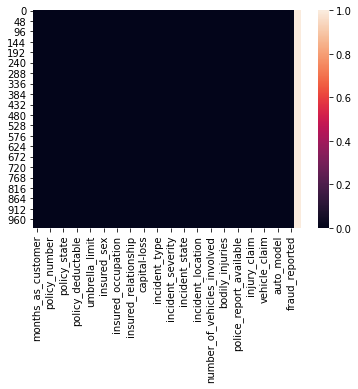

In [7]:
sns.heatmap(df.isnull())

## Handling missing values

In [8]:
# ? values convert into nan values
df.replace('?',np.nan , inplace =True)

In [9]:
# filling the missing value with most_frequent
from sklearn.impute import SimpleImputer
sm  = SimpleImputer(missing_values = np.nan ,strategy ='most_frequent')
df['collision_type'] = sm.fit_transform(df['collision_type'].values.reshape(-1,1))
df['property_damage'] =sm.fit_transform(df['property_damage'].values.reshape(-1,1))
df['police_report_available'] =sm.fit_transform(df['police_report_available'].values.reshape(-1,1))

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

## statistical summary

In [11]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


## correlation

In [12]:
df_cor = df.corr()
df_cor

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


<AxesSubplot:>

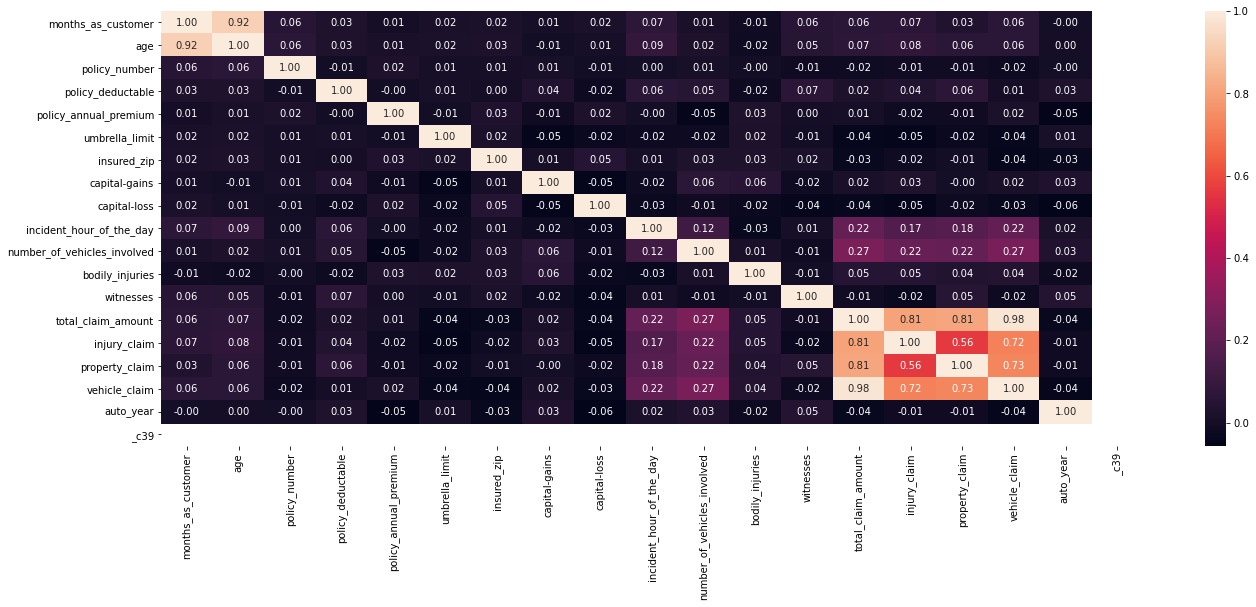

In [13]:
plt.figure(figsize =(22,8))
sns.heatmap(df_cor, annot =True ,fmt = '0.2f')

## Unique values

In [14]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [15]:
# drop the unnecessary columns
df.drop(['age', 'total_claim_amount','policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39'] ,inplace=True ,axis =1)

In [16]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   int32  
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   int32  
 6   insured_education_level      1000 non-null   int32  
 7   insured_occupation           1000 non-null   int32  
 8   insured_relationship         1000 non-null   int32  
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   int32  
 12  collision_type               1000 non-null   int32  
 13  incident_severity  

# Visualization

<AxesSubplot:>

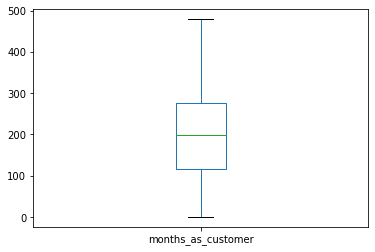

In [19]:
df['months_as_customer'].plot.box()

<AxesSubplot:>

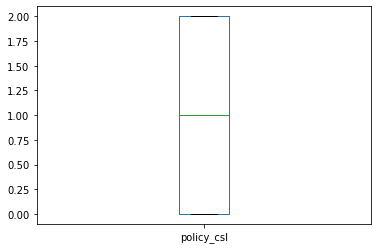

In [20]:
df['policy_csl'].plot.box()

<AxesSubplot:>

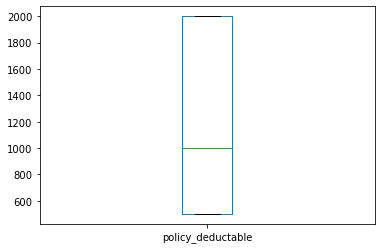

In [21]:
df['policy_deductable'].plot.box()

<AxesSubplot:>

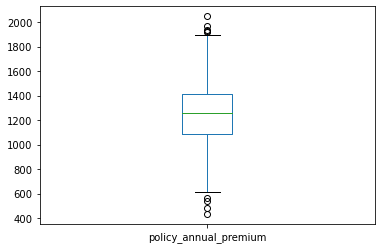

In [22]:
df['policy_annual_premium'].plot.box()

<AxesSubplot:>

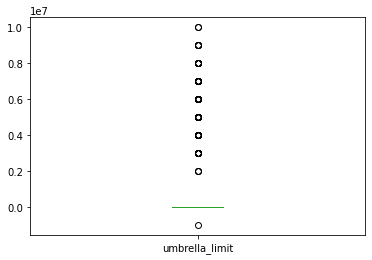

In [23]:
df['umbrella_limit'].plot.box()

<AxesSubplot:>

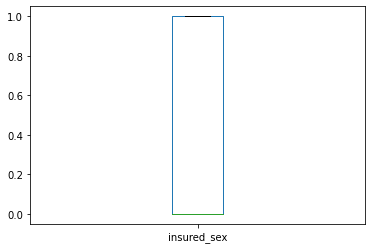

In [24]:
df['insured_sex'].plot.box()

<AxesSubplot:>

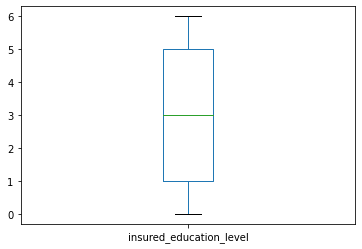

In [25]:
df['insured_education_level'].plot.box()

<AxesSubplot:>

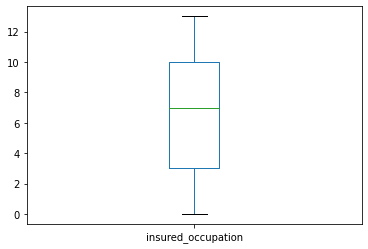

In [26]:
df['insured_occupation'].plot.box()

<AxesSubplot:>

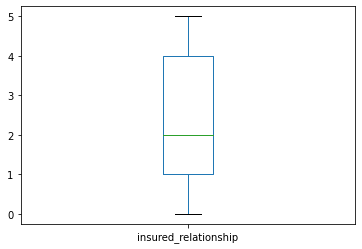

In [27]:
df['insured_relationship'].plot.box()

<AxesSubplot:>

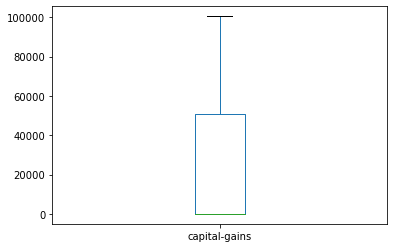

In [28]:
df['capital-gains'].plot.box()

<AxesSubplot:>

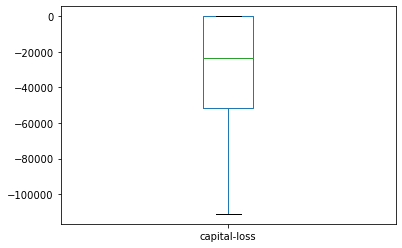

In [29]:
df['capital-loss'].plot.box()

<AxesSubplot:>

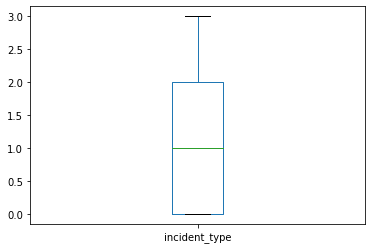

In [30]:
df['incident_type'].plot.box()

<AxesSubplot:>

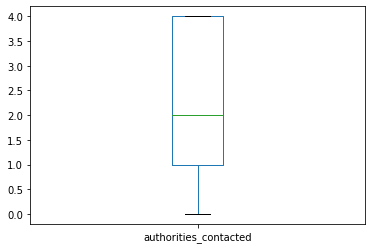

In [31]:
df['authorities_contacted'].plot.box()

<AxesSubplot:>

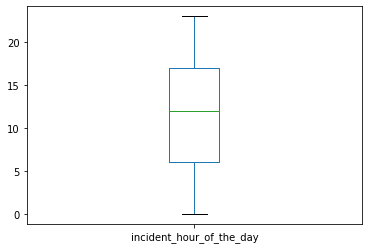

In [32]:
df['incident_hour_of_the_day'].plot.box()

<AxesSubplot:>

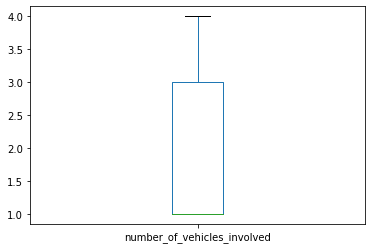

In [33]:
df['number_of_vehicles_involved'].plot.box()

<AxesSubplot:>

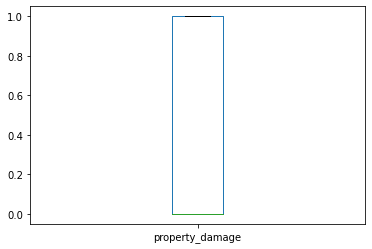

In [34]:
df['property_damage'].plot.box()

<AxesSubplot:>

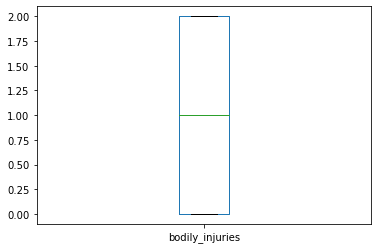

In [35]:
df['bodily_injuries'].plot.box()

<AxesSubplot:>

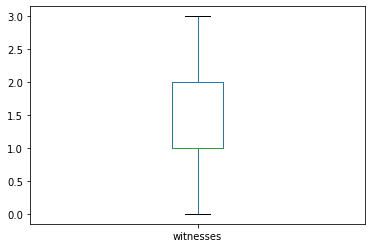

In [36]:
df['witnesses'].plot.box()

<AxesSubplot:>

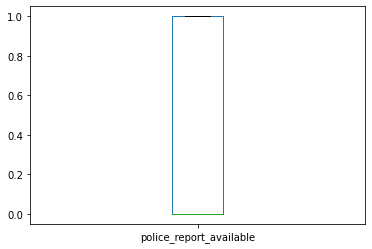

In [37]:
df['police_report_available'].plot.box()

<AxesSubplot:>

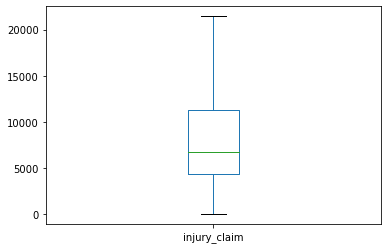

In [38]:
df['injury_claim'].plot.box()

<AxesSubplot:>

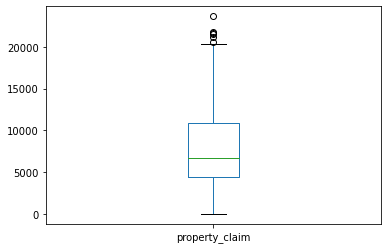

In [39]:
df['property_claim'].plot.box()

<AxesSubplot:>

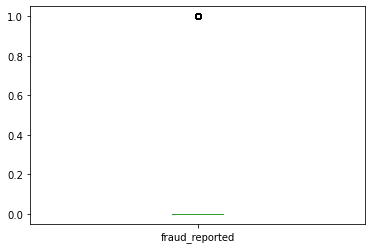

In [40]:
df['fraud_reported'].plot.box()

## checking skewness

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

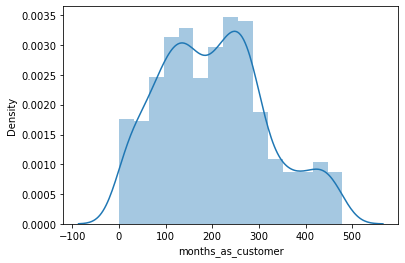

In [41]:
sns.distplot(df['months_as_customer'])

<AxesSubplot:xlabel='policy_csl', ylabel='Density'>

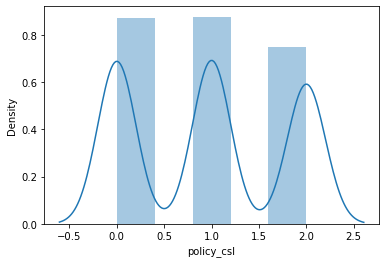

In [42]:
sns.distplot(df['policy_csl'])

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

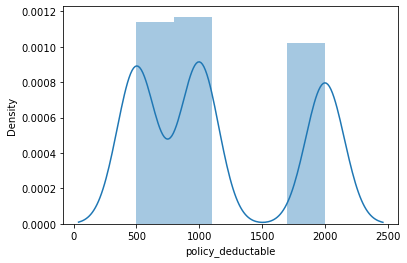

In [43]:
sns.distplot(df['policy_deductable'])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

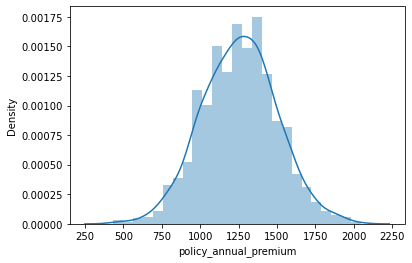

In [44]:
sns.distplot(df['policy_annual_premium'])

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

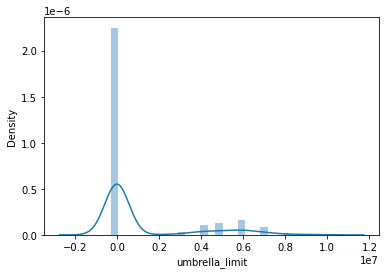

In [45]:
sns.distplot(df['umbrella_limit'])

<AxesSubplot:xlabel='insured_sex', ylabel='Density'>

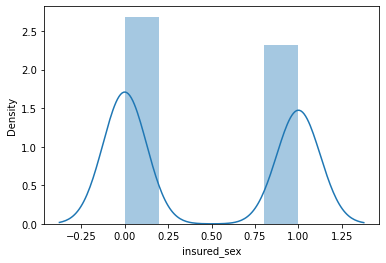

In [46]:
sns.distplot(df['insured_sex'])

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

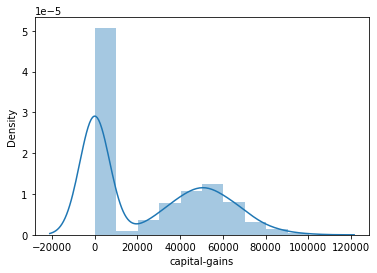

In [47]:
sns.distplot(df['capital-gains'])

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

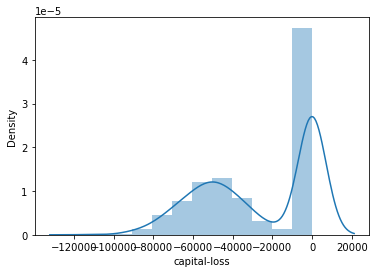

In [48]:
sns.distplot(df['capital-loss'])

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

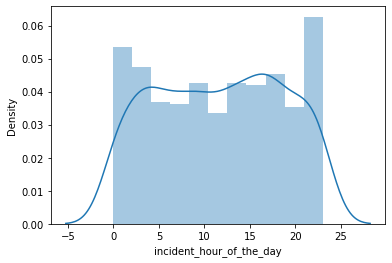

In [49]:
sns.distplot(df['incident_hour_of_the_day'])

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

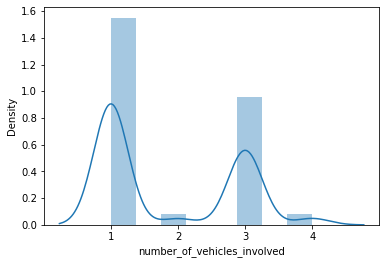

In [50]:
sns.distplot(df['number_of_vehicles_involved'])

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

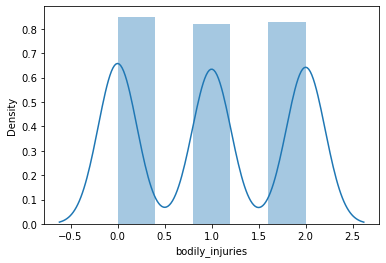

In [51]:
sns.distplot(df['bodily_injuries'])

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

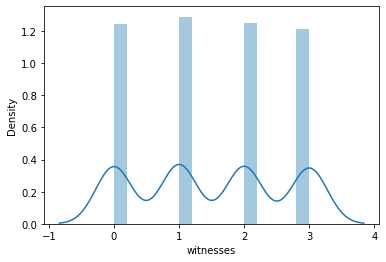

In [52]:
sns.distplot(df['witnesses'])

## Remove Outliers

In [53]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 4,  4,  4,  4,  4,  3,  3,  4,  4,  4,  4, 22,  4,  4,  4,  3, 10,
         4,  4,  4], dtype=int64))

In [54]:
df = df[(z<3).all(axis=1)]

In [55]:
df.shape

(980, 25)

### model building

In [56]:
x = df.drop('fraud_reported',axis = 1)
y = df['fraud_reported']

## Remove Skewness

In [57]:
from sklearn.preprocessing import power_transform
x = power_transform( x,method ='yeo-johnson')

In [58]:
x

array([[ 1.04454111,  0.18905105,  0.06315396, ...,  0.00858172,
         1.08980208,  0.7581298 ],
       [ 0.29904549,  0.18905105,  1.27180775, ..., -1.52209542,
        -1.5637232 , -1.78748531],
       [-0.51581942, -1.23186716,  1.27180775, ...,  0.22617755,
        -0.58207486, -0.82024583],
       ...,
       [-0.55427228,  0.18905105, -1.21521142, ...,  0.1906937 ,
         0.18625419,  0.78172811],
       [ 1.90408801,  1.23338925,  1.27180775, ..., -0.24807391,
        -0.26790911, -0.10201672],
       [ 1.89156317,  0.18905105,  0.06315396, ..., -1.69309349,
        -1.49907329, -1.77993883]])

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report

In [60]:
x_train ,x_test ,y_train ,y_test =train_test_split(x,y,test_size = .30, random_state = 50)

## Logistic Regression

In [61]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
predlg = lg.predict(x_test)
print("Accuracy_score", accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

Accuracy_score 0.8061224489795918
[[204  28]
 [ 29  33]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       232
           1       0.54      0.53      0.54        62

    accuracy                           0.81       294
   macro avg       0.71      0.71      0.71       294
weighted avg       0.80      0.81      0.81       294



## GaussianNB

In [62]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print("Accuracy_score", accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

Accuracy_score 0.7312925170068028
[[175  57]
 [ 22  40]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       232
           1       0.41      0.65      0.50        62

    accuracy                           0.73       294
   macro avg       0.65      0.70      0.66       294
weighted avg       0.79      0.73      0.75       294



## Decision Tree Classifier

In [63]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)
print("Accuracy_score", accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy_score 0.673469387755102
[[178  54]
 [ 42  20]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       232
           1       0.27      0.32      0.29        62

    accuracy                           0.67       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.70      0.67      0.68       294



## Random Forest Classifier

In [64]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print("Accuracy_score", accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy_score 0.7891156462585034
[[209  23]
 [ 39  23]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       232
           1       0.50      0.37      0.43        62

    accuracy                           0.79       294
   macro avg       0.67      0.64      0.65       294
weighted avg       0.77      0.79      0.78       294



## Gradient Boosting Classifier

In [65]:
gd = GradientBoostingClassifier()
gd.fit(x_train,y_train)
predgd =gd.predict(x_test)
print("Accuracy_score", accuracy_score(y_test,predgd))
print(confusion_matrix(y_test,predgd))
print(classification_report(y_test,predgd))

Accuracy_score 0.7925170068027211
[[205  27]
 [ 34  28]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       232
           1       0.51      0.45      0.48        62

    accuracy                           0.79       294
   macro avg       0.68      0.67      0.67       294
weighted avg       0.78      0.79      0.79       294



## cross Validation

In [66]:
scr = cross_val_score(lg, x,y,cv=5)
print('cross validation of logistic regression' ,scr.mean())

cross validation of logistic regression 0.7836734693877552


In [67]:
scr = cross_val_score(gnb,x,y ,cv=5)
print('cross validation score of GaussianNB ',scr.mean())

cross validation score of GaussianNB  0.7765306122448979


In [68]:
scr = cross_val_score(dtc,x,y ,cv=5)
print('cross validation score of dtc',scr.mean())

cross validation score of dtc 0.7051020408163267


In [69]:
scr = cross_val_score(rf,x,y ,cv=5)
print('cross validation score of RandomForestClassifier',scr.mean())

cross validation score of RandomForestClassifier 0.7755102040816326


## Hyper parameter tuning

In [70]:
from sklearn.model_selection import GridSearchCV

# Creating parameter list to pass in GridSearchCV
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth':[4,5,6,7,8],
                'criterion':['gini','entropy']}

In [71]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train, y_train) #Fitting the data in model
GCV.best_params_ # printing the best parameter found by GridSearchCV

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}

In [72]:
GCV_pred = GCV.best_estimator_.predict(x_test) # predicting with best parameters
accuracy_score(y_test, GCV_pred) #Checking final accuracy

0.8027210884353742

## ROC AUC PLOT

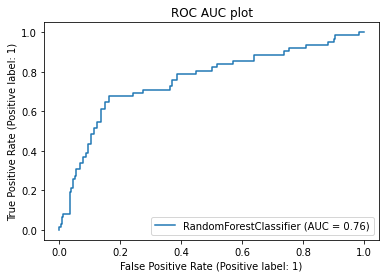

In [73]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test, y_test)
plt.title("ROC AUC plot")
plt.show()

## saving the model

In [74]:
import joblib
joblib.dump(lg,"Insurance_claim_froud")

['Insurance_claim_froud']